<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###마스크 연산

In [11]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from PIL import Image

In [ ]:
def handle_image(num):
  img = cv2.imread("/content/drive/MyDrive/mask/PNY0000%d.PNG" %(num))  #원본 이미지
  mask = cv2.imread("/content/drive/MyDrive/mask/PNY0000%d_mask.png"%(num))  #마스크 이미지
  #BGR to RGB
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #비트연산
  # bit_and = cv2.bitwise_and(img_rgb, mask)  #객체 검출
  bit_or = cv2.bitwise_or(img_rgb, mask)  #배경 검출
  #배경과 객체 다시 합치기
  # combine = cv2.bitwise_xor(bit_and, bit_or)
  #RGB to BGR
  result_bgr = cv2.cvtColor(bit_or,cv2.COLOR_RGB2BGR)
  #저장
  cv2.imwrite("/content/drive/MyDrive/result/bg/bg%d.png"%(num),result_bgr)


###이미지 합치기

In [16]:
src2 = cv2.imread('/content/drive/MyDrive/test/proj.png') #꽃
src1 = cv2.imread('/content/drive/MyDrive/test/bg.png') #배경
 
rows, cols, channels = src2.shape #꽃파일 픽셀값 저장
roi = src1[0:rows,0:cols] #꽃 파일 필셀값을 관심영역(ROI)으로 저장함. 

In [25]:
gray = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY) #꽃파일의 색상을 그레이로 변경
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY) #배경은 흰색으로, 그림을 검정색으로 변경
mask_inv = cv2.bitwise_not(mask)

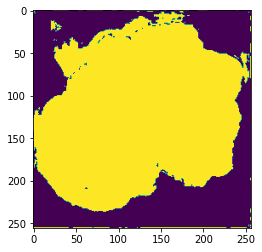

In [26]:
plt.imshow(mask) #배경 흰색, 로고 검정

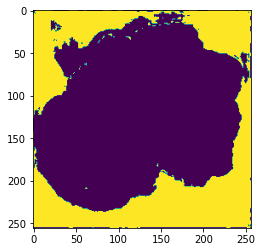

In [27]:
plt.imshow(mask_inv) # 배경 검정, 로고 흰색

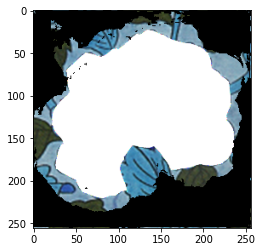

In [28]:
src1_bg = cv2.bitwise_and(roi,roi,mask=mask) #배경에서만 연산 = src1 배경 복사
plt.imshow(src1_bg)

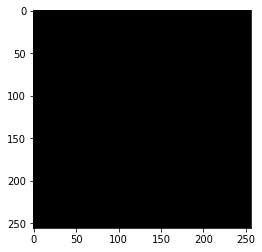

In [29]:
src2_fg = cv2.bitwise_and(src2,src2, mask = mask_inv) #로고에서만 연산
plt.imshow(src2_fg)


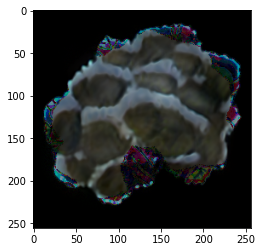

In [15]:
dst = cv2.bitwise_and(bg, t1) #src1_bg와 src2_fg를 합성
plt.imshow(dst)
 


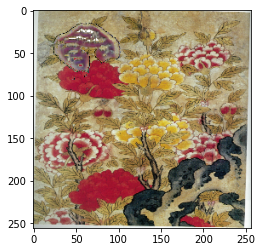

In [ ]:
src1[0:rows,0:cols] = dst #src1에 dst값 합성

src1_rgb = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
 
plt.imshow(src1_rgb)

In [ ]:
for i in range(1,7):
  handle_image(i)

###이미지 합치기 test



> waifu2x




In [2]:
!pip install -q cupy-cuda100
!pip install -q futures
!pip install -q chainer

     |████████████████████████████████| 58.9 MB 41.1 MB/s 
     |████████████████████████████████| 1.0 MB 5.4 MB/s 


In [3]:
!git clone -l -s https://github.com/tsurumeso/waifu2x-chainer.git waifu2x-chainer
%cd waifu2x-chainer

Cloning into 'waifu2x-chainer'...
remote: Enumerating objects: 1477, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1477 (delta 0), reused 0 (delta 0), pack-reused 1474
Receiving objects: 100% (1477/1477), 185.56 MiB | 37.74 MiB/s, done.
Resolving deltas: 100% (833/833), done.
/content/waifu2x-chainer


In [33]:
%cd /content/waifu2x-chainer
%pwd
!python waifu2x.py -m scale -i /content/drive/MyDrive/test/seed0003.png -o /content/drive/MyDrive/test/256 -g 0 -s 1.5 -a 0 -n 1


/content/waifu2x-chainer
/usr/local/lib/python3.7/dist-packages/chainer/_environment_check.py:75: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy-cuda111) version 9.4.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy-cuda111>=7.7.0,<8.0.0'

See the following page for more details:
  https://docs.cupy.dev/en/latest/install.html
--------------------------------------------------------------------------------

  requirement=requirement, help=help))
/usr/local/lib/python3.7/dist-packages/chainer/_environment_check.py:75: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy-cuda100) version 9.6.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy-cuda100>=7.7.0,<8.0.0'

See the following page for more details:
  h



> 256 crop



In [34]:
repo_url = 'https://github.com/GotG/object_detection_demo_flow'
import os
%cd /content
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))
!git clone {repo_url}
%cd {repo_dir_path}
!git pull

/content
fatal: destination path 'object_detection_demo_flow' already exists and is not an empty directory.
/content/object_detection_demo_flow
Already up to date.


In [36]:
!python resize_images.py --raw-dir '/content/drive/MyDrive/test/256' --save-dir '/content/drive/MyDrive/test/256out' --ext png --target-size "(256,256)"

2 files to resize from directory `/content/drive/MyDrive/test/256` to target size:(256, 256)
..
Done resizing 2 files.
Saved to directory: `/content/drive/MyDrive/test/256out`




> combine



In [6]:
import cv2

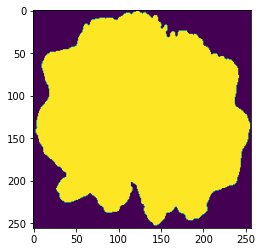

In [39]:
img = cv2.imread("/content/drive/MyDrive/test/256out/1.png")  #img2
bg = cv2.imread("/content/drive/MyDrive/test/bg.png") #img1

rows, cols, channels = img.shape
roi = bg[0:rows,0:cols]

img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(img2gray,50,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

bg_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)

img_fg = cv2.bitwise_and(img,img,mask=mask)

dst = cv2.add(bg_bg,img_fg)
bg[0:rows,0:cols] = dst

plt.imshow(bg)
plt.imshow(mask)




> save



In [38]:
cv2.imwrite("/content/drive/MyDrive/test/result.png",bg)

True